In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import skew, kurtosis


In [92]:
timeframe = '30min'
Type = 'Unweighted'

In [93]:
df_pnl_ib = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_ib_{timeframe}.csv")
df_pnl_ib = df_pnl_ib[df_pnl_ib['Type'] == Type]
df_pnl_ib.drop(columns=['Type'], inplace=True)
df_pnl_ib.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl_ib.drop(columns = ['final_PnL_weighted'], inplace=True)

df_pnl_all = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_all_log_ret_ex_momentum_{timeframe}.csv")
df_pnl_all = df_pnl_all[df_pnl_all['Type'] == Type]
df_pnl_all.drop(columns=['Type'], inplace=True)
df_pnl_all.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl_all.drop(columns = ['final_PnL_weighted'], inplace=True)

df_pnl_comb = pd.read_csv(f"/nfs/home/jingt/dissertation-iceberg/data/trading_strat/all_strat_single_comb_{timeframe}.csv")
df_pnl_comb = df_pnl_comb[df_pnl_comb['Type'] == Type]
df_pnl_comb.drop(columns=['Type'], inplace=True)
df_pnl_comb.rename(columns = {f"final_PnL_unweighted": "final_PnL"}, inplace=True)
df_pnl_comb.drop(columns = ['final_PnL_weighted'], inplace=True)

In [94]:
df_pnl_ib.set_index('Ticker', inplace=True)
df_pnl_ib.sort_values('final_PnL', ascending=False, inplace=True)
df_pnl_all.set_index('Ticker', inplace=True)
df_pnl_all.sort_values('final_PnL', ascending=False, inplace=True)
df_pnl_comb.set_index('Ticker', inplace=True)
df_pnl_comb.sort_values('final_PnL', ascending=False, inplace=True)

In [95]:
# df_pnl_ib = df_pnl_ib.replace([np.inf, -np.inf], 0).fillna(0)
# df_pnl_all = df_pnl_all.replace([np.inf, -np.inf], 0).fillna(0)
# df_pnl_comb = df_pnl_comb.replace([np.inf, -np.inf], 0).fillna(0)


In [96]:
df_pnl_ib['final_PnL'] = df_pnl_ib.iloc[:, :-1].sum(axis=1)
df_pnl_all['final_PnL'] = df_pnl_all.iloc[:, :-1].sum(axis=1)
df_pnl_comb['final_PnL'] = df_pnl_comb.iloc[:, :-1].sum(axis=1)

In [97]:
df_pnl_ib

,2019-01-10,2019-01-11,2019-01-14,2019-01-15,2019-01-16,2019-01-17,2019-01-18,2019-01-22,2019-01-23,2019-01-24,...,2019-12-18,2019-12-19,2019-12-20,2019-12-23,2019-12-24,2019-12-26,2019-12-27,2019-12-30,2019-12-31,final_PnL
Ticker,,,,,,,,,,,,,,,,,,,,,
FFIV,0.023526,0.011165,0.023528,-0.002674,0.001066,0.044832,0.009692,0.000394,-0.001417,0.010542,...,0.009630,0.001522,-0.009292,-0.004683,-0.000631,-0.008513,-0.005223,0.002768,-0.009300,0.634826
AOS,-0.007527,0.015828,0.001441,0.012697,0.000267,0.003807,-0.001819,-0.002164,0.014213,-0.003805,...,-0.009164,-0.011571,-0.001622,-0.020693,0.000927,0.000144,0.003871,-0.002762,-0.001837,0.616180
HII,0.011512,0.023663,0.011360,-0.001727,0.002269,0.030671,0.016454,0.025429,0.008850,0.027860,...,-0.011444,-0.001835,-0.001090,0.001548,0.003344,0.001741,0.005893,-0.000341,0.006757,0.615051
BEN,-0.010997,-0.004963,-0.009987,-0.006342,-0.004142,0.011769,-0.006216,0.016167,0.020336,0.022735,...,0.005169,0.003550,0.009533,0.006302,0.006211,-0.005759,-0.001637,0.008873,0.005682,0.595261
INCY,0.006160,-0.010069,-0.010036,0.035480,-0.006143,0.017603,-0.007585,0.011817,-0.004727,0.022741,...,0.008299,0.003265,0.005195,-0.009641,-0.015941,0.004135,0.005698,0.005055,0.006496,0.567093
ALB,-0.003950,-0.008731,0.014393,-0.014586,0.019094,-0.027800,0.006140,0.008516,0.018941,0.006240,...,0.014027,0.002303,0.003767,0.005995,-0.005214,0.003797,-0.005494,0.002295,0.001666,0.535772
WYNN,-0.022781,0.035498,0.015278,0.002501,0.004319,-0.016510,0.011481,0.013115,0.019691,0.020972,...,0.006665,-0.009044,0.002986,0.001478,0.003207,-0.006795,0.002173,-0.005277,0.000228,0.430107
AES,0.016252,0.007899,-0.007083,0.001400,0.001089,0.012477,0.017991,0.006275,-0.000026,-0.002441,...,0.011376,0.018365,0.004581,-0.001383,-0.002616,0.006667,0.001441,-0.004729,-0.000229,0.423639
MHK,0.019759,0.002861,0.002464,0.008865,-0.003837,0.006345,-0.005163,-0.024566,-0.029466,0.013229,...,-0.002124,0.005729,0.002366,0.024871,0.000129,0.003622,0.004171,-0.004614,-0.006071,0.316219


In [98]:
df_pnl_lst = [df_pnl_all, df_pnl_comb, df_pnl_ib]

In [99]:
def sharpe_test(returns):
    # Calculate the Sharpe ratio
    sharpe_ratio = np.mean(returns) / np.std(returns, ddof=1)
    
    # Number of observations
    T = len(returns)
    
    # Calculate skewness and kurtosis
    g3 = skew(returns)
    g4 = kurtosis(returns, fisher=False)  # fisher=False to match R's kurtosis (which includes the 3)
    
    # Calculate the modified Sharpe ratio statistic
    denominator = np.sqrt((1 - g3 * sharpe_ratio + (g4 - 1) * (sharpe_ratio ** 2) / 4) / (T - 1))
    modified_sharpe_stat = sharpe_ratio / denominator    
    # Calculate the two-tailed p-value
    p_value = 2 * min(norm.cdf(modified_sharpe_stat), 1 - norm.cdf(modified_sharpe_stat))

    annual_sharpe = np.sqrt(252) * sharpe_ratio
    
    return annual_sharpe, modified_sharpe_stat, p_value

In [100]:
def PPT(df_pnl, label, delta='2min'):
    day_trades = len(df_pnl.columns) - 1
    if delta == '30S':
        n_trades = 659
    if delta == '2min':
        n_trades = 164
    if delta == "10min":
        n_trades = 32
    if delta == '30min':
        n_trades = 10
    if delta == '60min':
        n_trades = 5

    total_trades = n_trades * day_trades

    PPT = df_pnl.iloc[:, -1] / total_trades

    PPT =  PPT.to_frame()

    PPT = PPT * 10000

    PPT.rename(columns={'final_PnL': f'PPT_{label}'}, inplace=True)

    return PPT

In [101]:
label_lst = ['all', 'comb', 'ib']

In [102]:
df = []

for df_pnl, label in zip(df_pnl_lst, label_lst):
    sharpe_ratio_lst = []
    p_value_lst = []
    sharpe_test_lst = []
    for i in range(len(df_pnl)):
        returns = df_pnl.iloc[i, :-1].to_numpy()
        sharpe_ratio, modified_sharpe_stat, p_value = sharpe_test(returns)
        p_value_lst.append(p_value)
        sharpe_test_lst.append(modified_sharpe_stat)
        sharpe_ratio_lst.append(sharpe_ratio)
    
    df_SRtest = pd.DataFrame({'ticker': df_pnl.index.to_list(), f"SR_{label}" : sharpe_ratio_lst, f"test_{label}" :sharpe_test_lst})
    df_SRtest.set_index('ticker', inplace=True)

    PPT_df = PPT(df_pnl, label, delta=timeframe)

    df_SRtest = df_SRtest.merge(PPT_df, left_index=True, right_index=True)


    df_SRtest


    df.append(df_SRtest)

df = pd.concat(df, axis=1)


In [103]:
df

,SR_all,test_all,PPT_all,SR_comb,test_comb,PPT_comb,SR_ib,test_ib,PPT_ib
AOS,4.825295,4.673803,3.181569,4.143714,4.087068,2.784657,3.744382,3.650731,2.504797
MHK,4.342525,4.021892,2.998666,2.948788,2.880552,2.044547,1.807932,1.750762,1.285444
HII,4.326513,4.411932,2.644697,4.472973,4.447443,2.641924,4.064565,4.008327,2.500207
FFIV,3.675238,3.828856,2.422803,3.157559,3.191634,2.067940,4.076989,4.221766,2.580593
BEN,3.869507,3.888892,2.386045,3.412066,3.228807,2.051083,3.838302,3.727576,2.419761
WYNN,2.161425,2.003096,1.766785,2.235906,2.107896,1.891663,2.093975,1.963553,1.748402
RL,2.250568,2.289415,1.642107,2.787044,2.801839,1.973462,1.616022,1.601121,1.183172
AES,2.487005,2.477635,1.532538,2.099929,2.042842,1.225431,3.021615,2.955774,1.722111
TAP,2.283341,2.218710,1.479734,2.220376,2.096571,1.430984,0.981456,0.964284,0.602981
INCY,1.844307,1.787505,1.405816,2.429739,2.406661,1.761371,3.057701,3.119287,2.305257


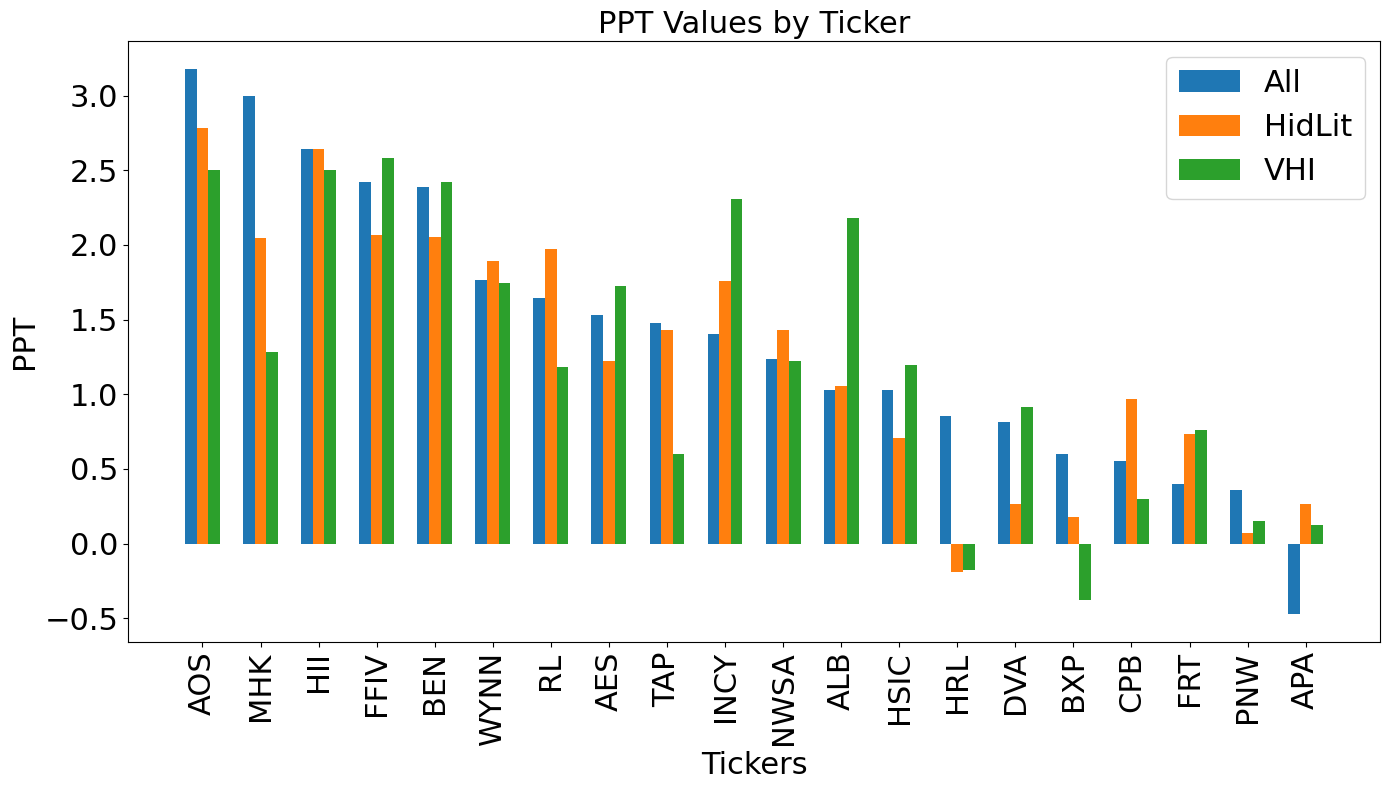

In [104]:
# Assuming df is your DataFrame with tickers as the index

# Define the position of each group of bars on the x-axis
x = range(len(df.index))

# Define the width of each bar
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each PPT column as a set of bars
ax.bar([pos - bar_width for pos in x], df['PPT_all'], width=bar_width, label='All')
ax.bar(x, df['PPT_comb'], width=bar_width, label='HidLit')
ax.bar([pos + bar_width for pos in x], df['PPT_ib'], width=bar_width, label='VHI')

# Add some text for labels, title and axes ticks with larger font size
ax.set_xlabel('Tickers', fontsize=22)
ax.set_ylabel('PPT', fontsize=22)
ax.set_title('PPT Values by Ticker', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90, fontsize=22)

# Increase the font size of the legend
ax.legend(fontsize=22)
# Increase the font size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=22)

# Show the plot
plt.tight_layout()
plt.show()

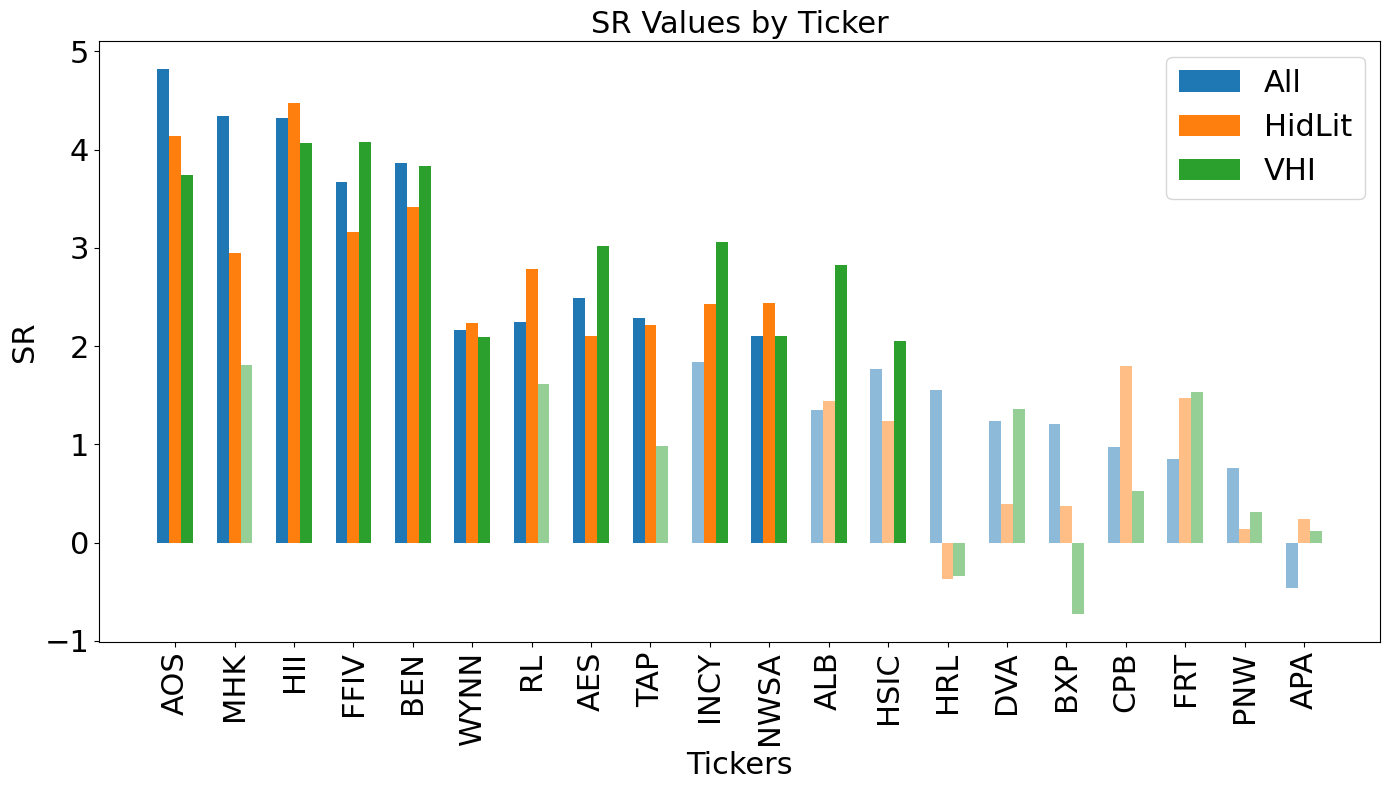

In [105]:
# Assuming df is your DataFrame with tickers as the index and the required columns
# Define the position of each group of bars on the x-axis
x = range(len(df.index))

# Define the width of each bar
bar_width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define the colors for each type of bar
color_all = '#1f77b4'   # Blue
color_comb = '#ff7f0e'  # Orange
color_vhi = '#2ca02c'   # Green

# Plotting each SR column as individual bars with alpha based on the test values
for i, pos in enumerate(x):
    ax.bar(pos - bar_width, df['SR_all'].iloc[i], width=bar_width, label='All' if i == 0 else "", 
           color=color_all, alpha=1 if df['test_all'].iloc[i] > 1.96 else 0.5)
    ax.bar(pos, df['SR_comb'].iloc[i], width=bar_width, label='HidLit' if i == 0 else "", 
           color=color_comb, alpha=1 if df['test_comb'].iloc[i] > 1.96 else 0.5)
    ax.bar(pos + bar_width, df['SR_ib'].iloc[i], width=bar_width, label='VHI' if i == 0 else "", 
           color=color_vhi, alpha=1 if df['test_ib'].iloc[i] > 1.96 else 0.5)

# Add some text for labels, title and axes ticks with larger font size
ax.set_xlabel('Tickers', fontsize=22)
ax.set_ylabel('SR', fontsize=22)
ax.set_title('SR Values by Ticker', fontsize=22)
ax.set_xticks(x)
ax.set_xticklabels(df.index, rotation=90, fontsize=22)

# Increase the font size of the legend
ax.legend(fontsize=22)

# Increase the font size of the y-axis tick labels
ax.tick_params(axis='y', labelsize=22)

# Show the plot
plt.tight_layout()
plt.show()

In [106]:
from prediction_ML_pipeline import save_dataframe_to_folder

In [107]:
import pandas as pd
df1 = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_regression/pred_ClOp_ff_comb.csv")
df2 = pd.read_csv("/nfs/home/jingt/dissertation-iceberg/data/output_regression/pred_ClOp_comb_ff_HII.csv")

In [108]:
df1 = df1.drop_duplicates(subset='ticker')
len(df1)

20

In [109]:
len(df1['ticker'])

20

In [110]:
df_comb = pd.concat([df1, df2])
print(len(df_comb))

21


In [111]:
save_dataframe_to_folder(df_comb, "/nfs/home/jingt/dissertation-iceberg/data/output_regression", "pred_ClOp_ff_comb.csv")

DataFrame saved to /nfs/home/jingt/dissertation-iceberg/data/output_regression/pred_ClOp_ff_comb.csv
